In [18]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
args = {'train_path':'/kaggle/input/house-prices-advanced-regression-techniques/train.csv',
       'test_path':'/kaggle/input/house-prices-advanced-regression-techniques/test.csv',
       'submission':'/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv'
}

In [14]:
train_data = pd.read_csv(args["train_path"])

In [8]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [16]:
train_data = train_data.drop(axis=1,columns=['Id','Alley', 'MasVnrType', 'FireplaceQu','PoolQC','Fence','MiscFeature'])
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [17]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [48]:
train_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

<Axes: xlabel='LandSlope', ylabel='count'>

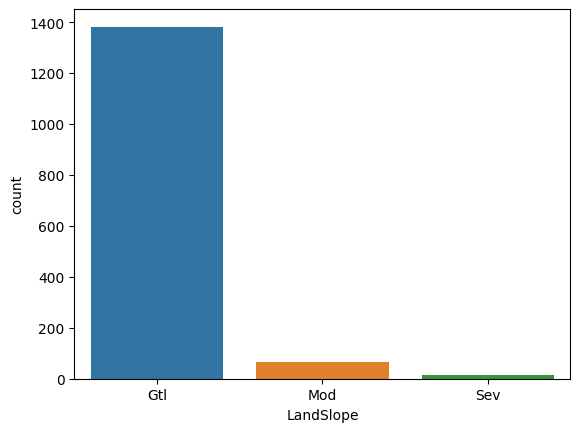

In [47]:
sns.countplot(data=train_data, x='LandSlope')

In [26]:
for idx, item in enumerate(train_data['MSZoning']):
    if item == 'RL':
        train_data.loc[idx, 'MSZoning'] = 0
    elif item =='RM':
        train_data.loc[idx, 'MSZoning'] = 1
    elif item == 'C (all)':
        train_data.loc[idx, 'MSZoning'] = 2
    elif item == 'FV':
        train_data.loc[idx, 'MSZoning'] = 3
    else:
        train_data.loc[idx, 'MSZoning'] = 4

In [29]:
for idx, item in enumerate(train_data['Street']):
    if item == 'Pave':
        train_data.loc[idx, 'Street'] = 0
    else:
        train_data.loc[idx, 'Street'] = 1

In [35]:
for idx, item in enumerate(train_data['LotShape']):
    if item == 'Reg':
        train_data.loc[idx, 'LotShape'] = 0
    elif item == 'IR1':
        train_data.loc[idx, 'LotShape'] = 1
    elif item == 'IR2':
        train_data.loc[idx, 'LotShape'] = 2
    else:
        train_data.loc[idx, 'LotShape'] = 3

In [39]:
for idx, item in enumerate(train_data['LandContour']):
    if item =='Lvl':
        train_data.loc[idx, 'LandContour'] = 0
    elif item == 'BNK':
        train_data.loc[idx, 'LandContour'] = 1
    elif item == 'Low':
        train_data.loc[idx, 'LandContour'] = 2
    else:
        train_data.loc[idx, 'LandContour'] = 3

In [42]:
for idx, item in enumerate(train_data['Utilities']):
    if item == 'AllPub':
        train_data.loc[idx, 'Utilities'] = 0
    else:
        train_data.loc[idx, 'Utilities'] = 1

In [45]:
for idx, item in enumerate(train_data['LotConfig']):
    if item == 'Inside':
        train_data.loc[idx, 'LotConfig'] = 0
    elif item =='FR2':
        train_data.loc[idx, 'LotConfig'] = 1
    elif item == 'Corner LotConfig':
        train_data.loc[idx, 'LotConfig'] = 2
    elif item == 'CulDSac':
        train_data.loc[idx, 'LotConfig'] = 3
    else:
        train_data.loc[idx, 'LotConfig'] = 4

In [ ]:
for idx, item in enumerate(train_data['LandSlope']):
    if item == 'Inside':
        train_data.loc[idx, 'LotConfig'] = 0
    elif item =='FR2':
        train_data.loc[idx, 'LotConfig'] = 1
    elif item == 'Corner LotConfig':
        train_data.loc[idx, 'LotConfig'] = 2
    elif item == 'CulDSac':
        train_data.loc[idx, 'LotConfig'] = 3
    else:
        train_data.loc[idx, 'LotConfig'] = 4

In [46]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Lotshape
0,60,0,65.0,8450,0,0,0,0,0,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500,0.0
1,20,0,80.0,9600,0,0,0,0,1,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500,0.0
2,60,0,68.0,11250,0,1,0,0,0,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500,1.0
3,70,0,60.0,9550,0,1,0,0,4,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000,1.0
4,60,0,84.0,14260,0,1,0,0,1,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000,1.0
